In [55]:
import pandas as pd
import numpy as np

In [56]:
# Lesen der CSV-Datei
df = pd.read_csv('Statistikkurs.csv')

In [57]:
# Anzeige der ersten fünf Zeilen des DataFrame
df.head()

,Timestamp,Geburtsjahr (z.B. 2003),Größe (in cm),Augenfarbe,Schulabschluss in ... (Name Bundesland oder Land),Wohnsituation,Weg zur Hochschule (in min)
0,10/15/2024 10:33:24,2005,163,Braun,Abitur in Bayern,Studi-Wohnheim,9
1,10/15/2024 10:33:33,1987,"183,5",Braun,NRW,Bei Familie,75
2,10/15/2024 10:33:34,2003,176,Braun,Bayern,Bei Familie,15-20min
3,10/15/2024 10:33:36,2004,183,Blau,Hessen,Eigene Wohnung,5
4,10/15/2024 10:33:42,2005,173,Braun,Hessen,Studi-Wohnheim,6 min


In [58]:
# Benennen Sie die Spalten der Übersichtlichkeit halber um
df.columns = ['Timestamp', 'Geburtsjahr', 'Groesse_cm', 'Augenfarbe', 'Schulabschluss_Bundesland', 'Wohnsituation', 'Weg_zur_Hochschule_min']

In [59]:
# Bereinigung der Spalte "Groesse_cm" durch Umwandlung von Stringwerten in numerische Werte
df['Groesse_cm'] = df['Groesse_cm'].replace(['1,80', '1, 83', '1,68', '1.63', '183,5'], [180, 183, 168, 163, 183.5])
df['Weg_zur_Hochschule_min'] = df['Weg_zur_Hochschule_min'].replace({
    '15-20min': 17.5,
    '6 min': 6,
    '15min': 15,
    '10 min': 10,
    '7 min (Fahrrad)': 7,
    '12 (zu Fuß)': 12,
    'Bus': np.nan
})

In [60]:
df.head()

,Timestamp,Geburtsjahr,Groesse_cm,Augenfarbe,Schulabschluss_Bundesland,Wohnsituation,Weg_zur_Hochschule_min
0,10/15/2024 10:33:24,2005,163,Braun,Abitur in Bayern,Studi-Wohnheim,9
1,10/15/2024 10:33:33,1987,183.5,Braun,NRW,Bei Familie,75
2,10/15/2024 10:33:34,2003,176,Braun,Bayern,Bei Familie,17.5
3,10/15/2024 10:33:36,2004,183,Blau,Hessen,Eigene Wohnung,5
4,10/15/2024 10:33:42,2005,173,Braun,Hessen,Studi-Wohnheim,6


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  17 non-null     object 
 1   Geburtsjahr                17 non-null     int64  
 2   Groesse_cm                 17 non-null     float64
 3   Augenfarbe                 17 non-null     object 
 4   Schulabschluss_Bundesland  17 non-null     object 
 5   Wohnsituation              17 non-null     object 
 6   Weg_zur_Hochschule_min     13 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ KB


In [62]:
# Relevante Spalten in numerische Werte umwandeln
df['Geburtsjahr'] = pd.to_numeric(df['Geburtsjahr'], errors='coerce')
df['Groesse_cm'] = pd.to_numeric(df['Groesse_cm'], errors='coerce')
df['Weg_zur_Hochschule_min'] = pd.to_numeric(df['Weg_zur_Hochschule_min'], errors='coerce')

In [63]:
df.head()

,Timestamp,Geburtsjahr,Groesse_cm,Augenfarbe,Schulabschluss_Bundesland,Wohnsituation,Weg_zur_Hochschule_min
0,10/15/2024 10:33:24,2005,163.0,Braun,Abitur in Bayern,Studi-Wohnheim,9.0
1,10/15/2024 10:33:33,1987,183.5,Braun,NRW,Bei Familie,75.0
2,10/15/2024 10:33:34,2003,176.0,Braun,Bayern,Bei Familie,17.5
3,10/15/2024 10:33:36,2004,183.0,Blau,Hessen,Eigene Wohnung,5.0
4,10/15/2024 10:33:42,2005,173.0,Braun,Hessen,Studi-Wohnheim,6.0


In [65]:
# Display basic descriptive statistics for numerical columns
df.describe()

,Geburtsjahr,Groesse_cm,Weg_zur_Hochschule_min
count,17.000000,17.000000,13.000000
mean,2002.588235,176.735294,24.730769
std,4.744191,9.447416,25.385868
min,1987.000000,162.000000,3.000000
25%,2002.000000,168.000000,7.000000
50%,2005.000000,180.000000,17.500000
75%,2005.000000,183.000000,30.000000
max,2006.000000,190.000000,80.000000


In [66]:
# Frequency counts for categorical variables
df['Augenfarbe'].value_counts()

Augenfarbe
Braun    7
Blau     6
Grün     4
Name: count, dtype: int64

In [67]:
df['Wohnsituation'].value_counts()

Wohnsituation
Studi-Wohnheim    7
Bei Familie       4
Eigene Wohnung    4
WG                2
Name: count, dtype: int64

In [70]:
# Mode of columns
df['Augenfarbe'].mode()

0    Braun
Name: Augenfarbe, dtype: object

In [71]:
# Range for 'Groesse_cm'
range_größe = df['Groesse_cm'].max() - df['Groesse_cm'].min()
print(f'Range der Groesse_cm: {range_größe}')

Range der Groesse_cm: 28.0


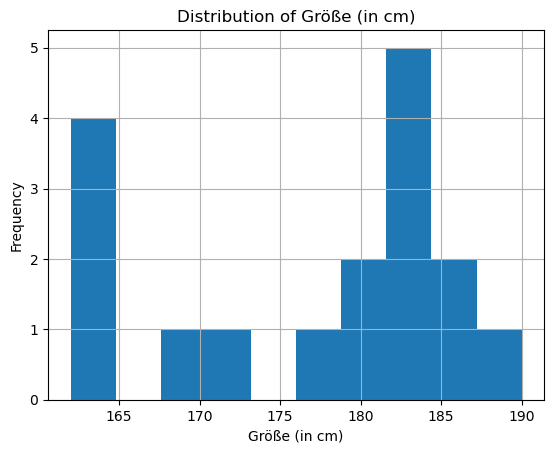

In [73]:
import matplotlib.pyplot as plt

# Histogram for 'Größe (in cm)'
df['Groesse_cm'].hist(bins=10)
plt.title('Distribution of Größe (in cm)')
plt.xlabel('Größe (in cm)')
plt.ylabel('Frequency')
plt.show()

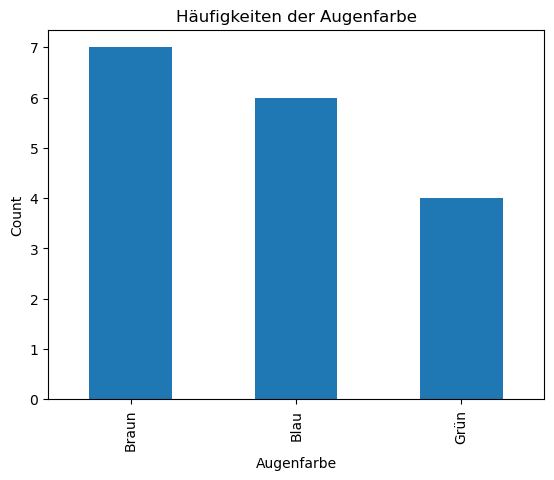

In [75]:
# Bar plot for 'Augenfarbe'
df['Augenfarbe'].value_counts().plot(kind='bar')
plt.title('Häufigkeiten der Augenfarbe')
plt.xlabel('Augenfarbe')
plt.ylabel('Count')
plt.show()


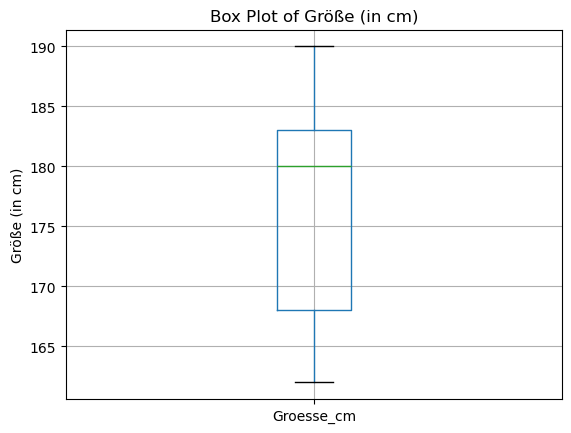

In [76]:
# Box plot for 'Groesse_cm'
df.boxplot(column='Groesse_cm')
plt.title('Box Plot of Größe (in cm)')
plt.ylabel('Größe (in cm)')
plt.show()


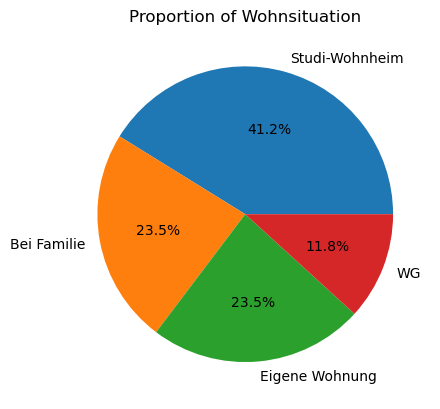

In [77]:
# Pie chart for 'Wohnsituation'
df['Wohnsituation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Wohnsituation')
plt.ylabel('')
plt.show()


In [78]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                        Geburtsjahr  Groesse_cm  Weg_zur_Hochschule_min
Geburtsjahr                1.000000   -0.125296               -0.486218
Groesse_cm                -0.125296    1.000000                0.302136
Weg_zur_Hochschule_min    -0.486218    0.302136                1.000000


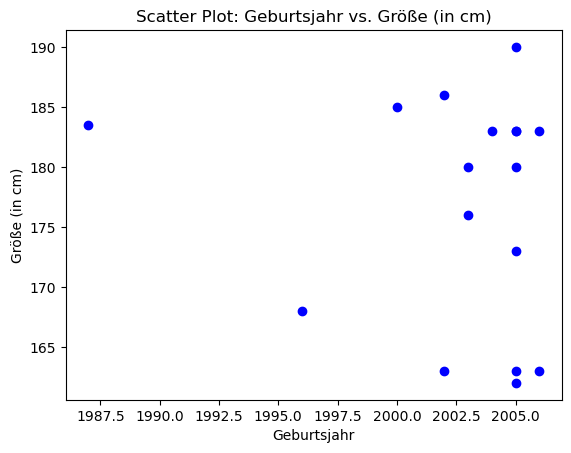

In [81]:
import matplotlib.pyplot as plt

# Scatter plot: Geburtsjahr vs. Größe (in cm)
plt.scatter(df['Geburtsjahr'], df['Groesse_cm'], color='blue')

# Adding title and labels
plt.title('Scatter Plot: Geburtsjahr vs. Größe (in cm)')
plt.xlabel('Geburtsjahr')
plt.ylabel('Größe (in cm)')

# Display the plot
plt.show()

In [83]:
# Nach Augenfarbe gruppieren und durchschnittliche Größe berechnen
grouped = df.groupby('Augenfarbe')['Groesse_cm'].mean()
print(grouped)

Augenfarbe
Blau     181.000000
Braun    174.785714
Grün     173.750000
Name: Groesse_cm, dtype: float64
